In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Setting the seed for reproducibility
np.random.seed(42)


In [8]:
# Generate the classification dataset
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=42)


In [10]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [11]:
# Train a Gradient Boosting Classifier
gbc = GradientBoostingClassifier(n_estimators=100, max_depth=3, learning_rate=0.1, random_state=42)
gbc.fit(X_train, y_train)

# Predict on the test set
y_pred = gbc.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')


Accuracy: 1.0000


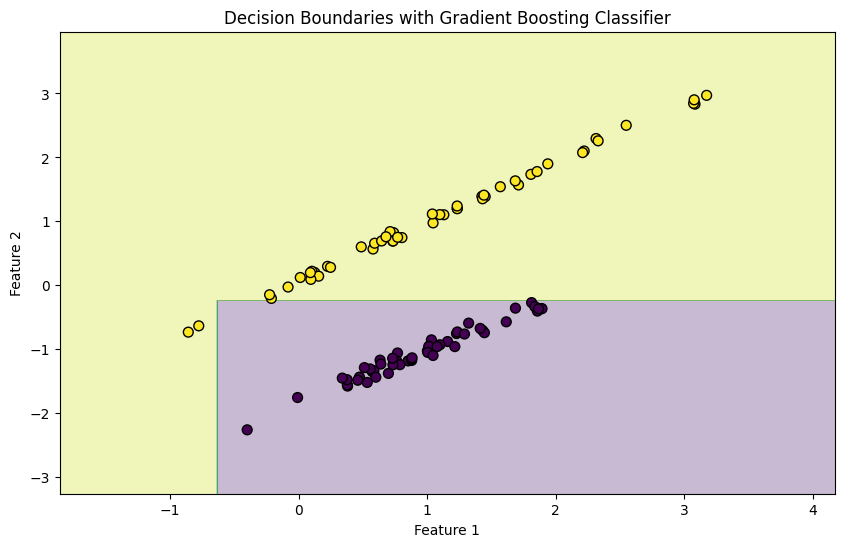

In [12]:
# Function to plot decision boundaries
def plot_decision_boundaries(X, y, model, ax):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.3)
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', s=50)

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
plot_decision_boundaries(X, y, gbc, ax)
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_title('Decision Boundaries with Gradient Boosting Classifier')
plt.show()
